# Experimentation Pipeline

This notebook is the definitive experimentation NFL 2022 pipeline, where we will explore how our different tests are doing.

In [2]:
import os
import re
import sys
import tqdm
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import random
import seaborn as sns

# Libraries required for plotting field
import matplotlib.patches as patches
from matplotlib.patches import Arc
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import animation
from IPython.display import HTML
from IPython import display


# Custom libraries
sys.path.append('../')
from src.utils.viz_functions import visualize_play
from src.utils.play_preprocessing import preprocessPlay_refQB_NFrames, preprocessPlay_refQB, preprocessPlay_refLineScrimmageInit
from src.utils.player_influence import extract_play_players_influence, gaussian_player_influence_score, gaussian_oop_influence_score
from src.utils.field_price_functions import calculate_field_price, gaussian_field_price
from src.utils.calculate_score import calculate_defense_score, calculate_qb_score
from src.utils.full_pipeline import run_full_pipeline, run_short_pipeline

In [3]:
# Define input parameters
input_path = '../input'
preprocessing_path = '../processing'

config = {
    # Preprocessing Play parameters
    'preprocess_funct': preprocessPlay_refLineScrimmageInit,
    'hold_QB_ref': 20,
    'post_snap_time': 8,

    # Pocket parameters
    'pocket_len': 15.0,
    'pocket_res': 0.1,

    # Field Price parameters
    'pocket_linear_max_value': 1.0,
    'pocket_gaus_mu': 0.0,
    'pocket_gaus_sigma': 1.0,
    'field_price_funct': gaussian_field_price,

    # Player Influence parameters
    'gaus_mu': 0.0,
    'gaus_sigma': 1.0,
    'player_infl_funct': gaussian_player_influence_score,

    # OOP Penalty
    'qb_oop_infl_funct': gaussian_oop_influence_score,
    'qb_oop_penalty': 800.0,
    'gaus_oop_mu': 0.0,
    'gaus_oop_sigma': 1.0,
}

# 1. Run Full Pipeline

In [ ]:
run_full_pipeline(input_path, preprocessing_path, config)

# 2. Explore and Visualize Single Plays

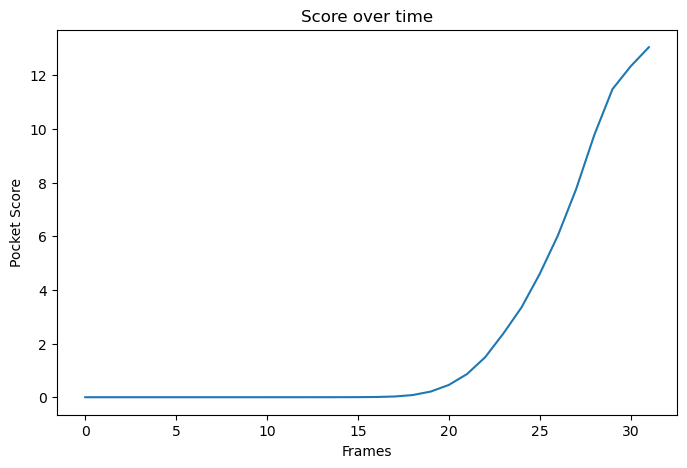

In [3]:
week1_data = pd.read_csv(os.path.join(input_path, 'week1.csv'))

# Define Game & Play ID
gameId = "2021090900"
playId = "3933"
# gameId = "2021091201"
# playId = "691"

# Visualize play
visualize_play(week1_data, gameId, playId, config)

# 3. Reduced List of Plays to Explore

Preprocessing features...


100%|██████████| 14/14 [00:16<00:00,  1.17s/it]


Processing plays...


100%|██████████| 14/14 [00:21<00:00,  1.51s/it]


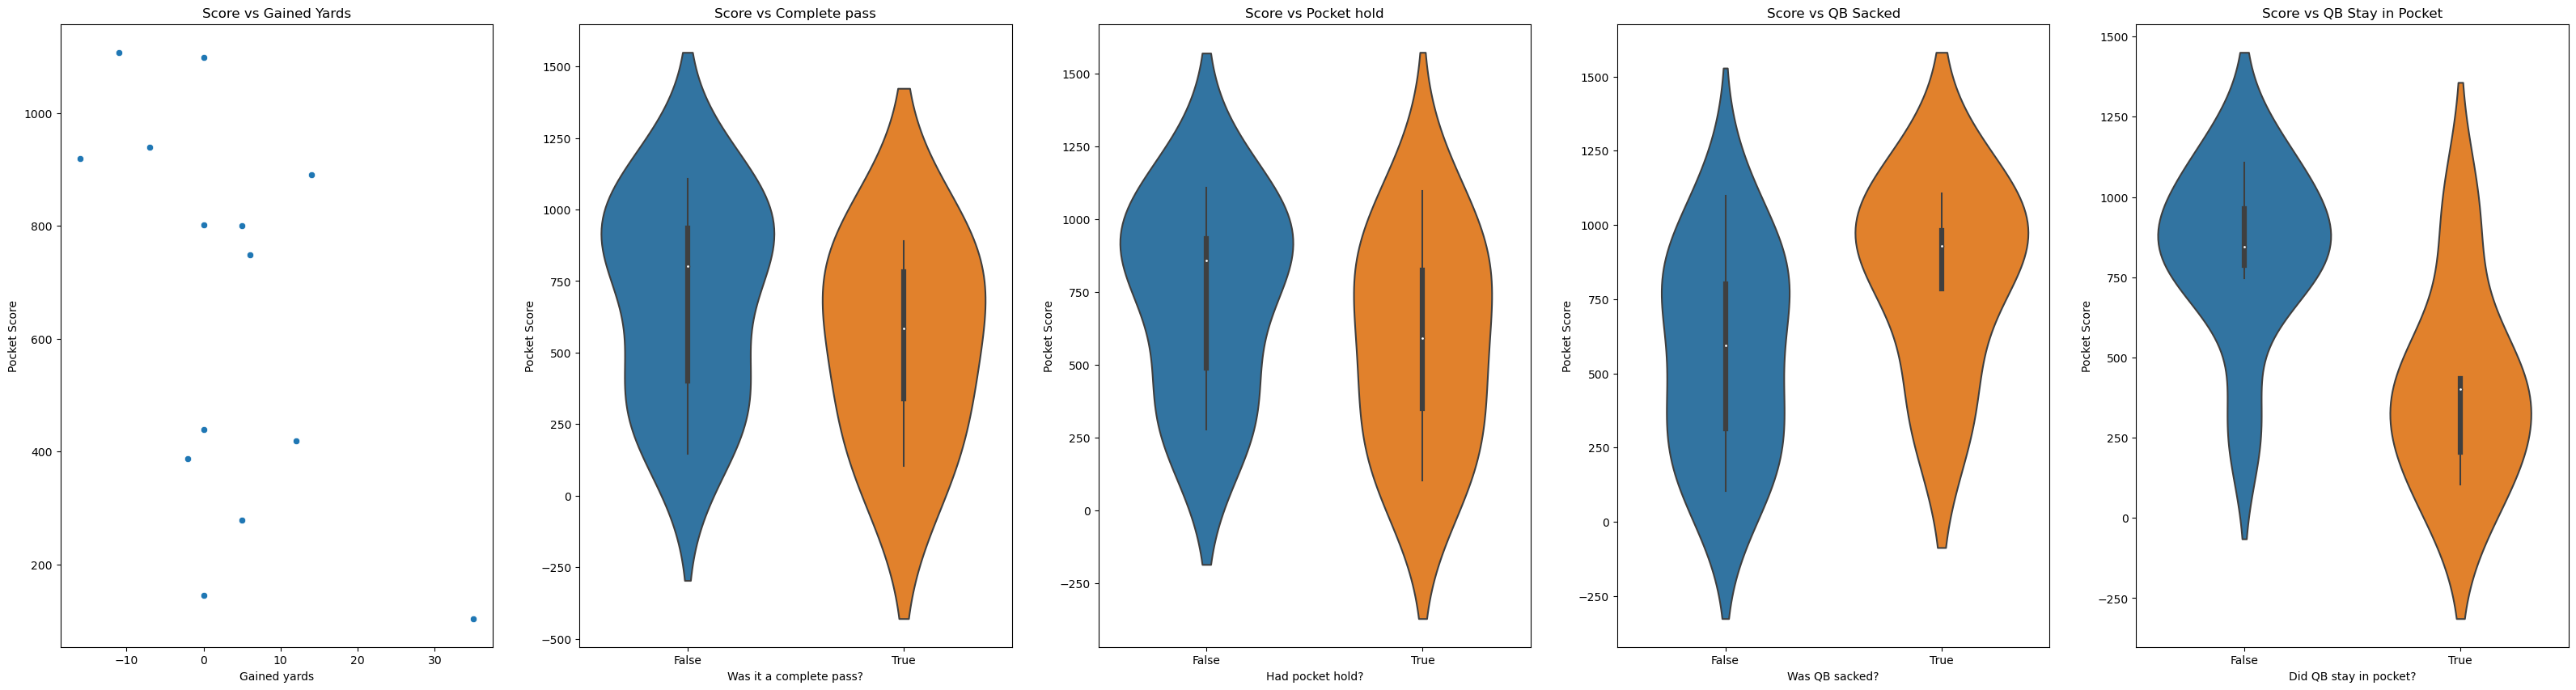

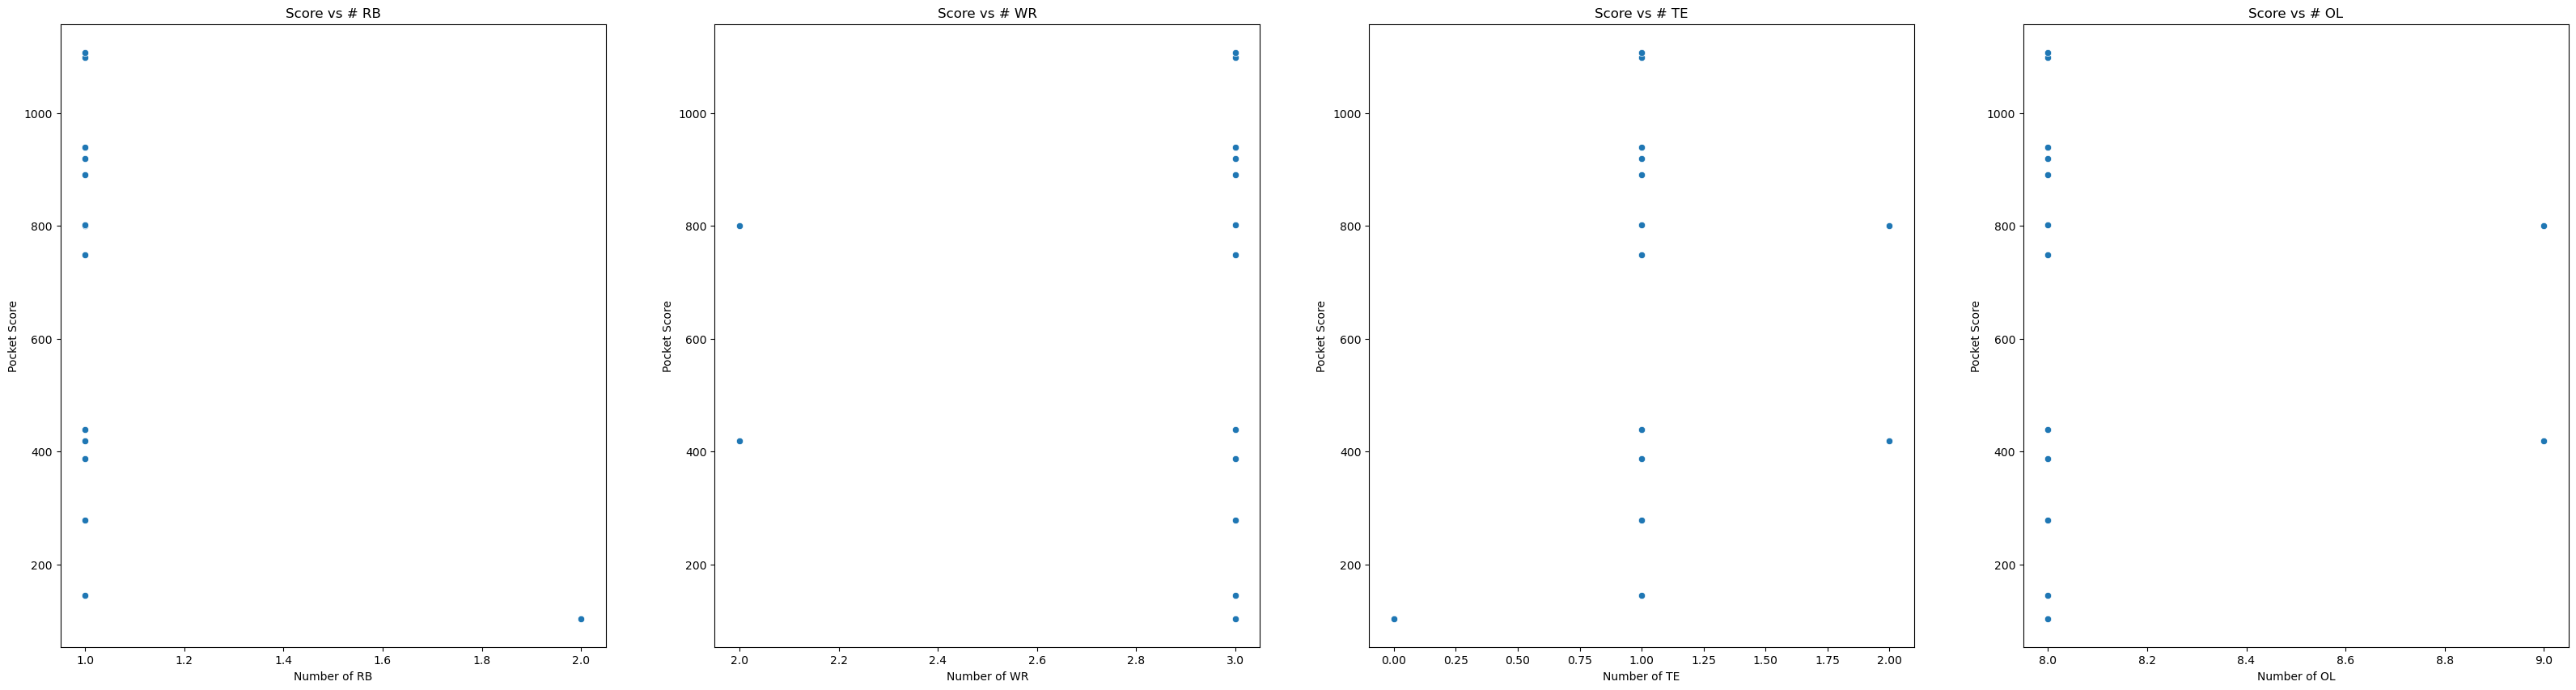

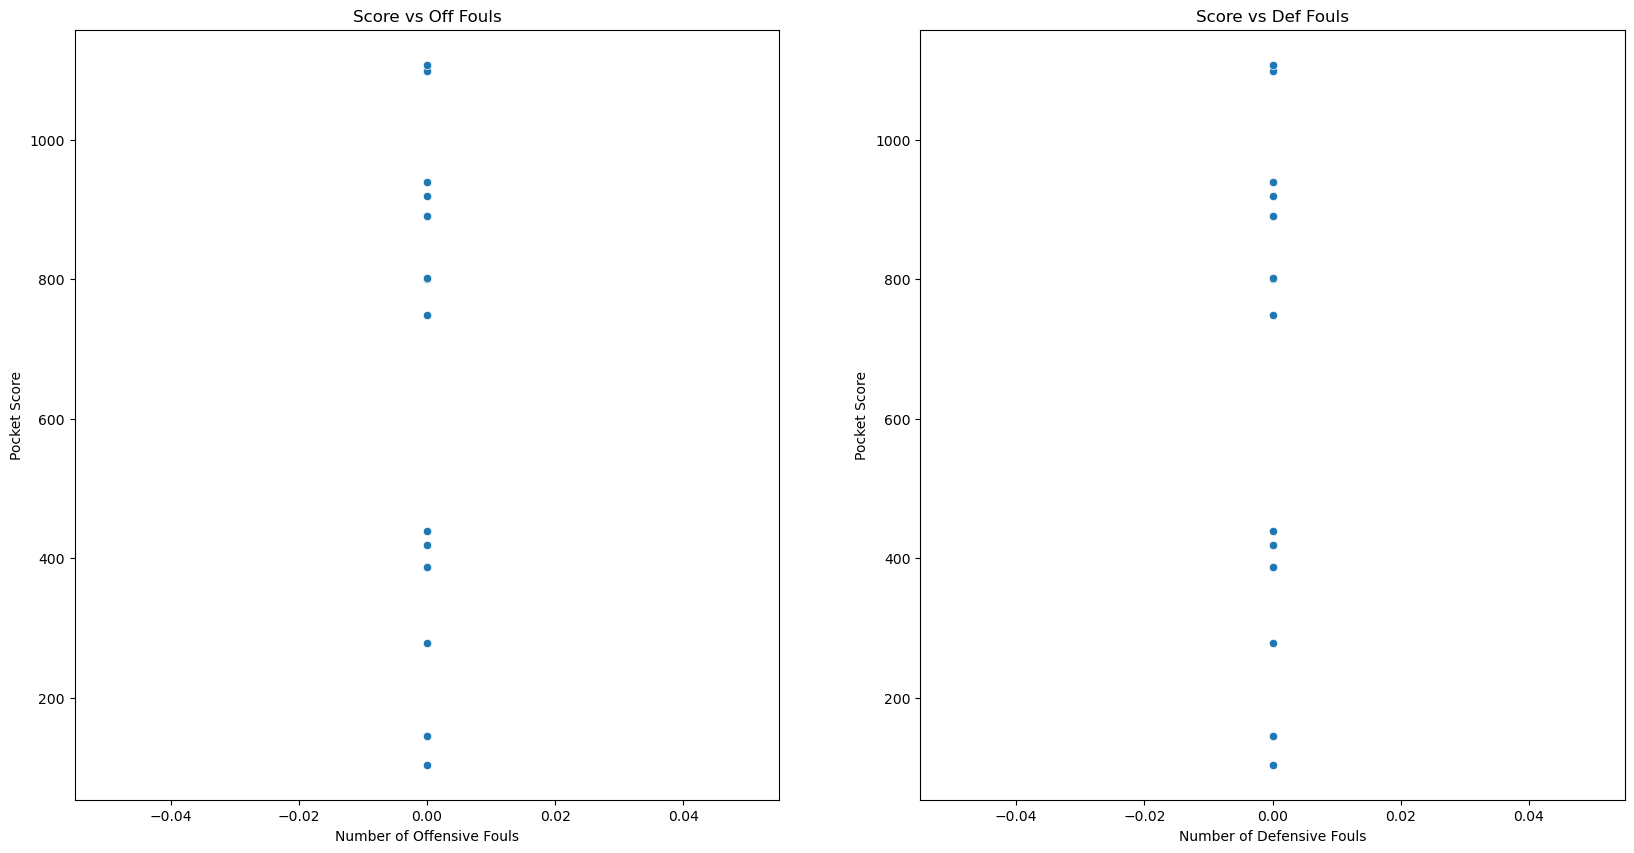

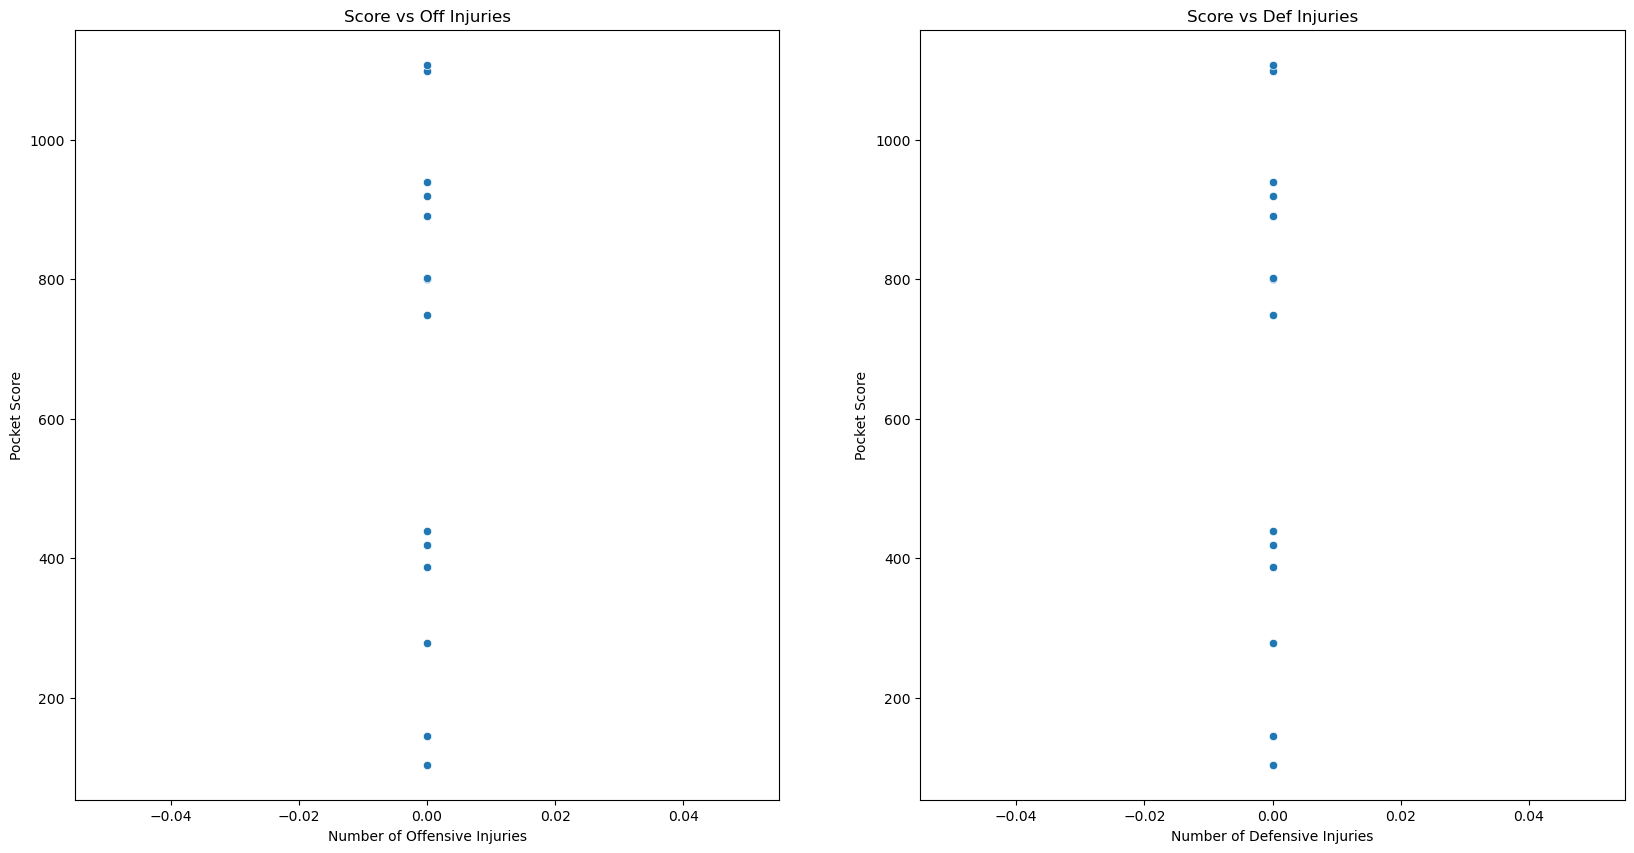

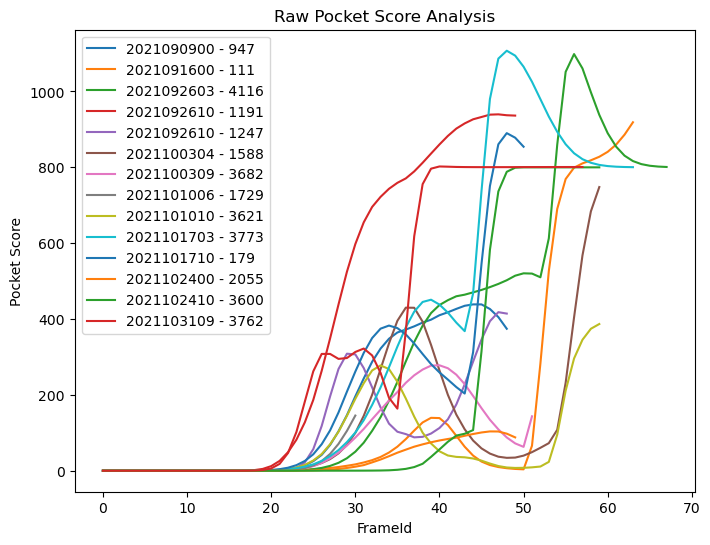

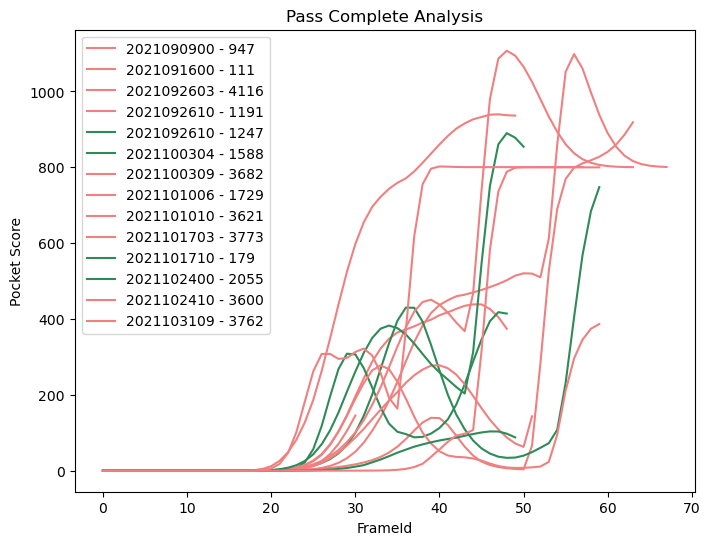

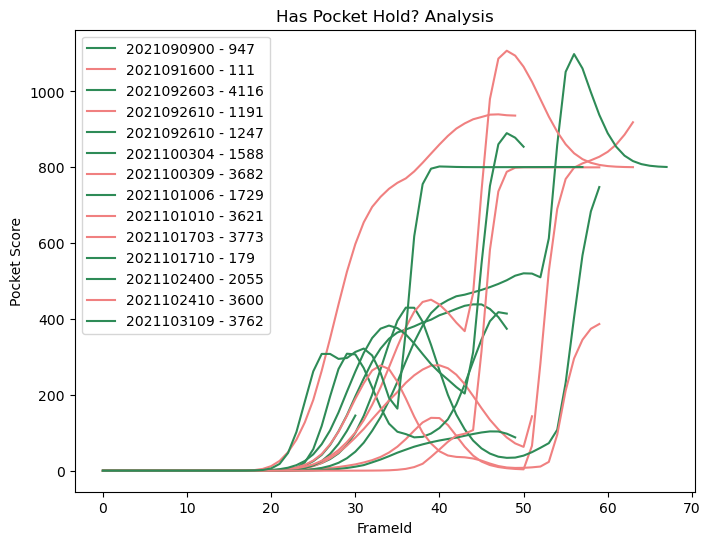

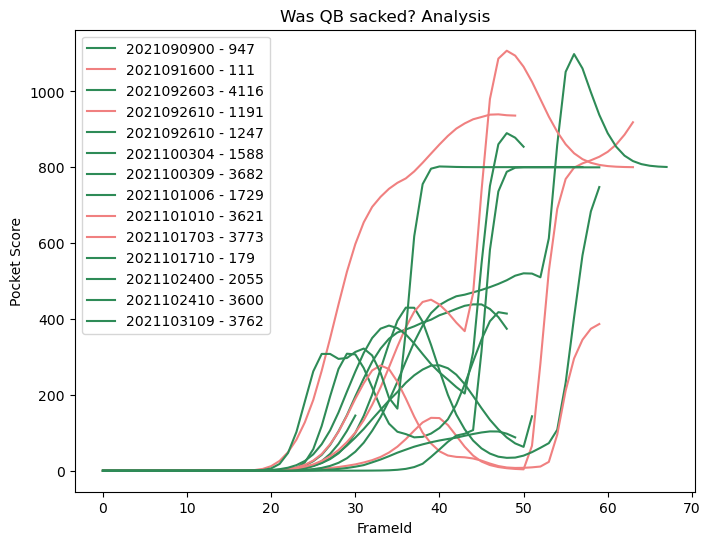

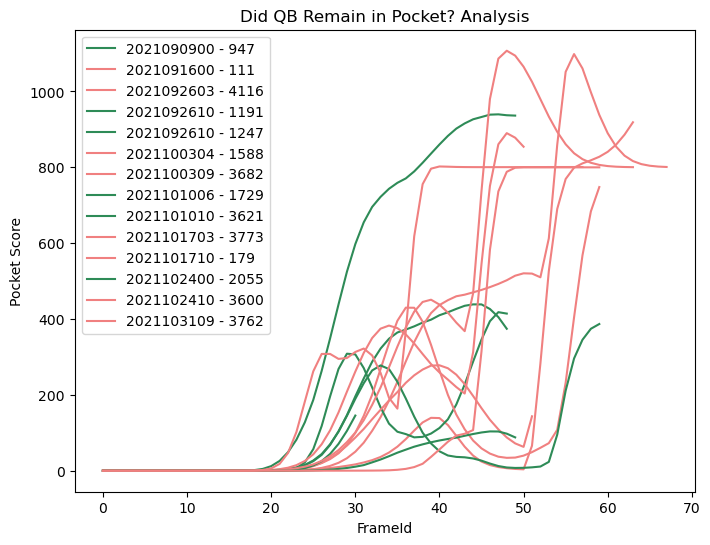

In [4]:
plays = pd.read_csv(f"{input_path}/plays_analysis.csv")
run_short_pipeline(input_path, preprocessing_path, plays.values, config, timeseries_plots = True, runId = "short_run_1")

In [6]:
plays

,weekId,gameId,playId
0,week1.csv,2021090900,947
1,week2.csv,2021091600,111
2,week3.csv,2021092603,4116
3,week3.csv,2021092610,1191
4,week3.csv,2021092610,1247
5,week4.csv,2021100304,1588
6,week4.csv,2021100309,3682
7,week5.csv,2021101006,1729
8,week5.csv,2021101010,3621
9,week6.csv,2021101703,3773


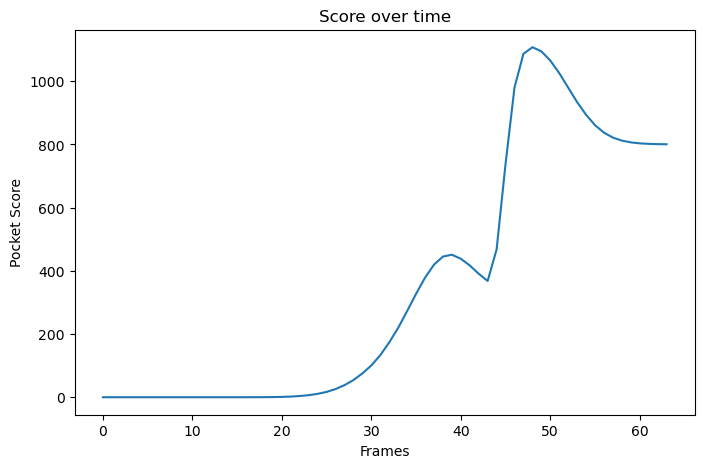

In [4]:
week_data = pd.read_csv(os.path.join(input_path, 'week6.csv'))

# Define Game & Play ID
gameId = "2021101703"
playId = "3773"
# gameId = "2021091201"
# playId = "691"

# Visualize play
visualize_play(week_data, gameId, playId, config)